# RECRUITING ANALYSYS

O objectivo desta análise é a identificação dos perfis que tendem a desistir no processo de recrutamento.

Elaboração do Documento:
    
    - Autor: Diogo Santos
    - Data: 13 de Março de 2018

## INDICE

### Exploração de Dados Inicial
- Import de ficheiro de dados e módulos de análise
- Exploração Inicial
- Relações entre variáveis

### Limpeza e Estruturação dos Dados
- Imputação de dados em falta
- Tranformação de variáveis
- Refazer Exploração

### Preparação para Modelação
- Verificar Correlações e Colineariedade nas Variáveis

### Modelação
- Criação do dados para treino e teste
- Correr diferentes classificadores
- Hyper-parameter tuning
- Matriz de Confusão

### Validação do Modelo
- Cross Validation
- Ranking das principais variáveis no modelo

### Ensembling
- Voting Classifier


## Exploração de Dados Inicial

##### Import de dados e módulos de análise

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

# Disable warnings
import warnings
warnings.simplefilter('ignore')

# Plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn library
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

#Importing the data
train=pd.read_csv(r'C:\Users\dsilsant\Desktop\Projecto Recruiting\Data for Import\Recruiting_Data_import.csv',
                 sep=';',encoding='latin-1')
print('Os dados importados tem {} colunas e {} registos.'.format(train.shape[1],train.shape[0]))

Os dados importados tem 26 colunas e 11284 registos.


###### Exploração Inicial

In [174]:
train.head()

,Contratado,Desistencia,EstadoCandidatura,AnoNascimento,MesNascimento,Curso,...,Responsavel1Entrevista,AreaEveris,Nível,Responsavel2Entrevista,EntrevistaFinalResponsavel,Fases
0,0,1,Entrevista Inicial,1980.0,7.0,IT,...,RDM,NaN,NaN,NaN,NaN,1
1,0,0,Testes,1983.0,4.0,Engenharia,...,NaN,NaN,NaN,NaN,NaN,1
2,0,1,Análise,NaN,NaN,Economia,...,NaN,NaN,NaN,NaN,NaN,0
3,0,1,Entrevista Intermédia,1984.0,3.0,Engenharia,...,TSB,05 - Business,Júnior com Experiência,RJS,NaN,2
4,0,1,Análise,NaN,NaN,Engenharia IT,...,NaN,NaN,NaN,NaN,NaN,0


Changing some information to simplify the analysis

In [2]:
train.loc[train['TipoCurso']=='Bacharelato','TipoCurso']='Licenciatura' #Passar Bacharelato a Licenciatura
train.loc[train['TipoCurso']=='Curso Tecnológico','TipoCurso']='12º Ano' #Passar Cursos Tecnológico a 12ano
train.loc[train['TipoCurso']=='12º Ano','Universidade']='Sem Universidade' #Colocar pessoas com 12ano sem universidade
train.loc[train['TipoCurso']=='12º Ano','Curso']='Sem Curso' #Colocar pessoas com 12ano sem curso

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11287 entries, 0 to 11286
Data columns (total 26 columns):
Contratado                     11287 non-null int64
Desistencia                    11287 non-null int64
EstadoCandidatura              11287 non-null object
AnoNascimento                  9144 non-null float64
MesNascimento                  9144 non-null float64
Curso                          11056 non-null object
Universidade                   10909 non-null object
TipoCurso                      11018 non-null object
OrigemCandidatura              11015 non-null object
Recomendado                    11287 non-null object
Disponibilidade                11287 non-null object
Grupo                          11287 non-null object
AnaliseTeste                   11287 non-null int64
Testes_1Entrevista             11287 non-null int64
1Entrevista_2Entrevista        11287 non-null int64
2Entrevista_EntrevistaFinal    11287 non-null int64
TotalEntrevista                11287 non-null int

**Missing Data**

In [176]:
train.isnull().sum()

Contratado                         0
Desistencia                        0
EstadoCandidatura                  0
AnoNascimento                   2143
MesNascimento                   2143
Curso                            231
Universidade                     378
TipoCurso                        269
OrigemCandidatura                272
Recomendado                        0
Disponibilidade                    0
Grupo                              0
AnaliseTeste                       0
Testes_1Entrevista                 0
1Entrevista_2Entrevista            0
2Entrevista_EntrevistaFinal        0
TotalEntrevista                    0
AnoRecepcao                      496
MesRecepcao                      496
AnaliseResponsavel               663
Responsavel1Entrevista          4808
AreaEveris                     10131
Nível                           9954
Responsavel2Entrevista          8508
EntrevistaFinalResponsavel      9392
Fases                              0
dtype: int64

**DESISTENCIA**

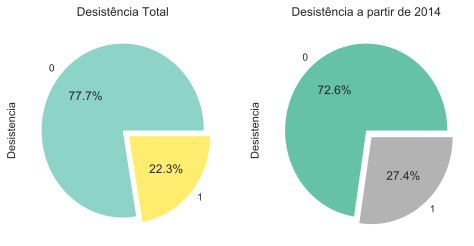

In [426]:
f,ax=plt.subplots(1,2,figsize=(8,4))
#Desistência Total
train['Desistencia'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],colormap='Set3')
ax[0].set_title('Desistência Total')

#Desistência a partir de 2014
train.loc[train['AnoRecepcao']>=2014,'Desistencia'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],colormap='Set2')
ax[1].set_title('Desistência a partir de 2014')
plt.show()

Evidenciado o aumento na taxa de desistência no Recrutamento

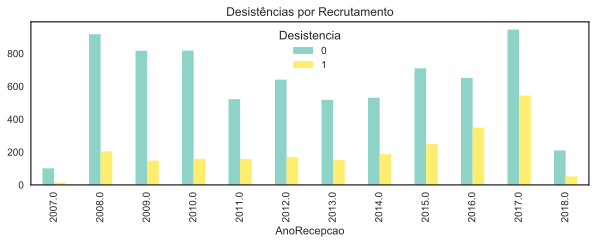

,Ano Recepção,Total Processos,Valores Médios
11,2018.0,262,0.198473
10,2017.0,1490,0.365101
9,2016.0,1001,0.348651
8,2015.0,959,0.259645
7,2014.0,719,0.261474
6,2013.0,669,0.225710
5,2012.0,812,0.210591
4,2011.0,680,0.232353
3,2010.0,977,0.162743
2,2009.0,965,0.153368


In [427]:
datacontratado=train.loc[(train['Contratado']==0),] #Apenas candidatos não contratados
pd.crosstab(datacontratado.AnoRecepcao,datacontratado.Desistencia).plot(kind='bar',figsize=(10,3),colormap='Set3')
plt.title('Desistências por Recrutamento')
plt.show()

#Tabela de Valores
amean=datacontratado.groupby(['AnoRecepcao'])['Desistencia'].mean()
acount=datacontratado.groupby(['AnoRecepcao'])['Desistencia'].count()
mediarecepcao=pd.concat([pd.DataFrame({'Ano Recepção':amean.index}),pd.DataFrame({'Total Processos':acount.values}),
                        pd.DataFrame({'Valores Médios':amean.values})],axis=1)
mediarecepcao.sort_values(by=['Ano Recepção'],ascending=False)

COMENTÁRIOS:
- De todos os candidatos não contratados incluidos na base de dados desde 2007 a 2019, 22.3% sairam devido a Desistência
- Os níveis de recrutamento tem vindo a aumentar desde 2013
- A taxa de Desistência aumentou em termos relativos, rondado a média em 2017 nos 37%, o número mais alto de sempre.

2014 é o primeiro ano onde atingimos sempre valores de Desistência históricos e será por isso a partir desta data que será feita a análise.

**Definição de dados para treinar o modelo**

In [428]:
data=train.loc[(train['AnoRecepcao']>=2014),]
# Processos com início em 2014, porque é o ano do crescimento histórico.

print('O novos dados tem {} colunas e {} registos'.format(data.shape[1],data.shape[0]))

O novos dados tem 26 colunas e 5044 registos


**SUMMARY DASHBOARD**

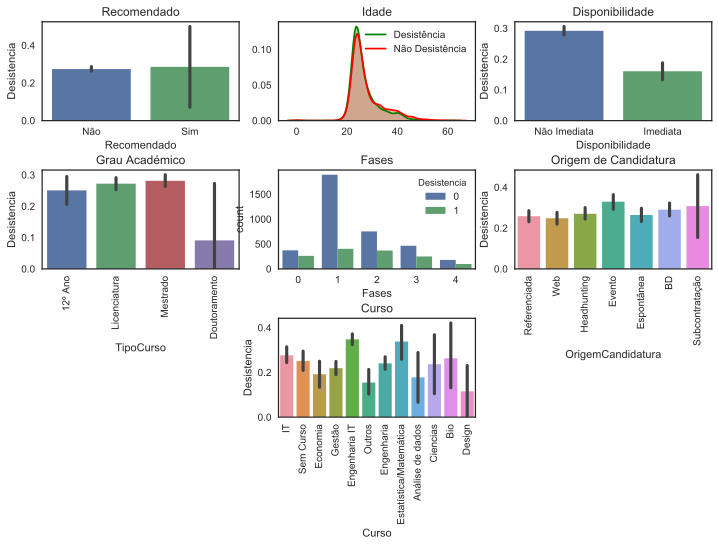

In [429]:
warnings.filterwarnings(action='ignore')
plt.figure(figsize=[12,10])

#Recomendado
plt.subplot(431)
sns.barplot('Recomendado','Desistencia' ,data=data)
plt.title('Recomendado')
#Ano Nascimento - Idade
data['Idade']= 0
data['Idade']=data['AnoRecepcao'] - data['AnoNascimento']
plt.subplot(432)
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==1),'Idade'],
            color='g',shade=True,label='Desistência')
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==0),'Idade'],
            color='r',shade=True,label='Não Desistência')
plt.title('Idade')
#Disponibilidade
plt.subplot(433)
sns.barplot('Disponibilidade','Desistencia' ,data=data)
plt.title('Disponibilidade')
#Grau Académico
plt.subplot(434)
sns.barplot('TipoCurso', 'Desistencia', data=data,
           order=['12º Ano','Licenciatura','Mestrado','Doutoramento'])
plt.xticks(rotation=90)
plt.title('Grau Académico')
#Fases
plt.subplot(435)
sns.countplot('Fases',hue='Desistencia' ,data=data,)
plt.title('Fases')
#Origem de Candidatura
plt.subplot(436)
sns.barplot('OrigemCandidatura','Desistencia' ,data=data)
plt.xticks(rotation=90)
plt.title('Origem de Candidatura')
#Curso
plt.subplot(438)
sns.barplot('Curso','Desistencia', data=data)
plt.xticks(rotation=90)
plt.title('Curso')

plt.subplots_adjust(hspace=0.50)
plt.show()

- Recomendado - É uma variável que poderia eventualmente ter bastante importância, contudo em 5047 processos apenas 14 pessoas foram recomendadas.
- Idade - As médias são muito identicas. Não parece ser uma variável relevante.
- Disponibilidade - Poderá vir a ser uma variável muito relevante. A disponibilidade não imediata apresenta uma média de 29% face a disponibilidade imediata de cerca de 15%
- Grau Académico - Mestrados com o maior nível de Desistência
- Fases de Recrutamento - Valores estranhos. 0 fases de recrutamento não é um número comum, contudo apresenta um elevado número de desistências. A maior parte dos processos duram apenas 1 ou 2 fases. Quanto menor o número de fases menor o número de desistências.
- Origem Candidatura - Uma grande incidência em candidatos seleccionado em eventos.
- Curso - Maior Incidência nas Engenharia IT e Estatística/Matemática, sendo as áreas com maior procura no mercado atualmente.

**Estado Candidatura**

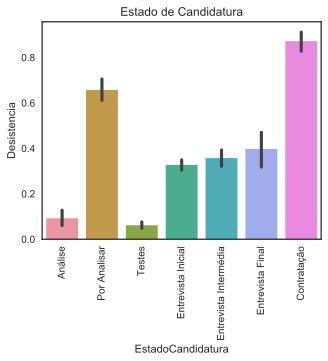

In [430]:
sns.barplot('EstadoCandidatura', 'Desistencia', data=data,
            order=['Análise','Por Analisar','Testes','Entrevista Inicial','Entrevista Intermédia','Entrevista Final','Contratação'])
plt.xticks(rotation=90)
plt.title('Estado de Candidatura')
plt.show()

In [156]:
pd.crosstab(data.EstadoCandidatura,data.Fases)

Fases,0,1,2,3,4
EstadoCandidatura,,,,,
Análise,271,9,2,0,0
Contratado,0,8,134,304,156
Contratação,0,0,41,122,64
Entrevista Final,0,0,46,61,44
Entrevista Inicial,0,1185,456,40,2
Entrevista Intermédia,0,23,397,183,10
Por Analisar,364,25,4,3,1
Testes,0,1045,41,2,1


COMENTÁRIOS:
- As desistências ocorrem essencialmente na fase de **Contratação** e na Fase **Por analisar**

**Idade**

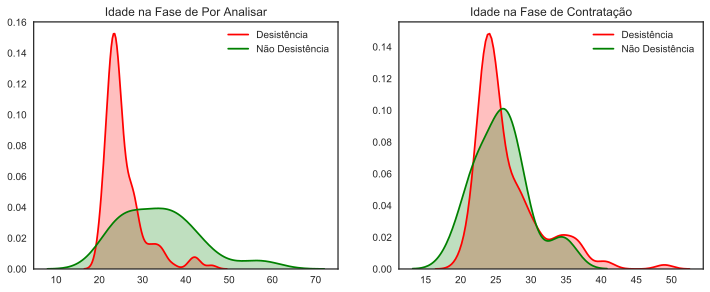

In [431]:
plt.figure(figsize=[12,10])

# Plot Por Analisar
plt.subplot(221)
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==1)&(data['EstadoCandidatura']=='Por Analisar'),'Idade'],
            color='r',shade=True,label='Desistência')
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==0)&(data['EstadoCandidatura']=='Por Analisar'),'Idade'],
            color='g',shade=True,label='Não Desistência')
plt.title('Idade na Fase de Por Analisar')

# Plot Contratação
plt.subplot(222)
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==1)&(data['EstadoCandidatura']=='Contratação'),'Idade'],
            color='r',shade=True,label='Desistência')
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==0)&(data['EstadoCandidatura']=='Contratação'),'Idade'],
            color='g',shade=True,label='Não Desistência')
plt.title('Idade na Fase de Contratação')
plt.show()

COMENTÁRIOS:
- Em ambas as Fases com maior desistência, as idades com mais propensão para desistência são compreendidas entre 24 e 27 anos.

**Curso**

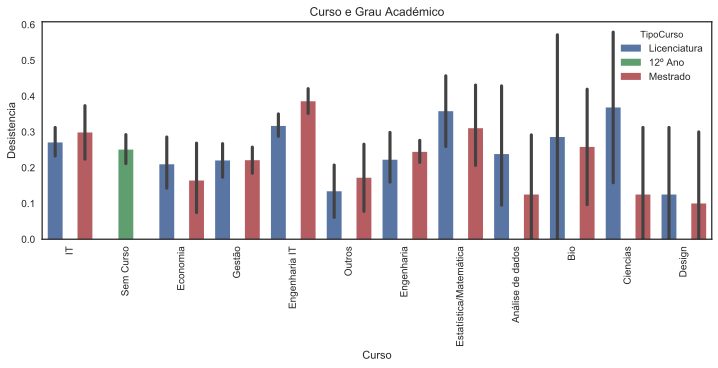

In [432]:
plt.figure(figsize=[12,4])
sns.barplot(x='Curso',y='Desistencia',hue='TipoCurso',data=data.loc[data['TipoCurso']!='Doutoramento',])
plt.xticks(rotation=90)
plt.title('Curso e Grau Académico')
plt.show()

COMMENTS:
- Engenharia IT é o curso onde existêm mais desistências;
- Mestrado aumenta ainda mais os números de desistências

In [10]:
#New collumns
a=data.groupby(['Universidade'])['Desistencia'].mean()#.sort_values(ascending=False)
b=data.groupby(['Universidade'])['Contratado'].mean()#.sort_values(ascending=False)
collumns=np.transpose(a.index)
avalues=np.transpose(a.values)
bvalues=np.transpose(b.values)

#New DataFrame
means=pd.concat([pd.DataFrame({'Universidade':collumns}),
                 pd.DataFrame({'Desistência':avalues}),
                 pd.DataFrame({'Contratação':bvalues}),
                pd.DataFrame({'Diferença':avalues-bvalues})],axis=1)
means.sort_values(by=['Diferença'],ascending=False)

,Universidade,Desistência,Contratação,Diferença
0,ESTRANGEIRO,0.310345,0.043103,0.267241
18,U ÉVORA,0.361111,0.111111,0.250000
9,ISEGI - UNL,0.352381,0.114286,0.238095
2,FCT,0.306818,0.113636,0.193182
19,UAL,0.250000,0.062500,0.187500
12,IST,0.331563,0.144158,0.187405
20,UCP,0.261538,0.076923,0.184615
5,IP,0.285714,0.122449,0.163265
1,FC - U LISBOA,0.293333,0.146667,0.146667
14,Sem Universidade,0.250653,0.104439,0.146214


COMMENTS:
- O ranking de desistências é liderado por:
    - Estrangeiro
    - Universidade de Évora
    - ISEGI (De onde surgem os recursos de Gestão de Informação e Estatística)

**Grau Académico**

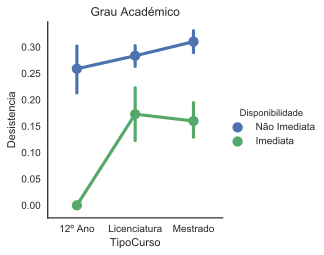

In [433]:
#TIPO DE CURSO
sns.factorplot(x='TipoCurso',y='Desistencia',hue='Disponibilidade',
               data=data.loc[data['TipoCurso']!='Doutoramento',],
              order=['12º Ano','Licenciatura','Mestrado'],size=3.5)
plt.title('Grau Académico')
plt.show()

COMMENTS:
- O maior crescimento deu-se nos individuos com Licenciatura.

**Origem de Candidatura**

Text(0.5,1,'Origem de Candidatura vs Disponibilidade')

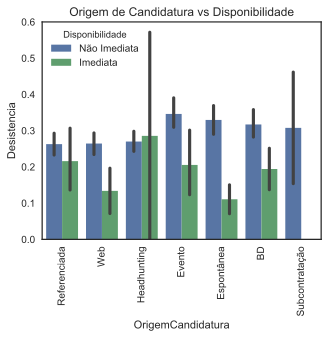

In [434]:
sns.barplot(x='OrigemCandidatura',y='Desistencia',hue='Disponibilidade',data=data)
plt.xticks(rotation=90)
plt.title('Origem de Candidatura vs Disponibilidade')

COMMENTS:
- Candidatos em Candidatura Espontânea e Web e com disponibilidade imediata, tem rates de desistência muitos baixas.
- Candidatos de eventos, tem rates elevadas de desistência

Text(0.5,1,'Média Desistência')

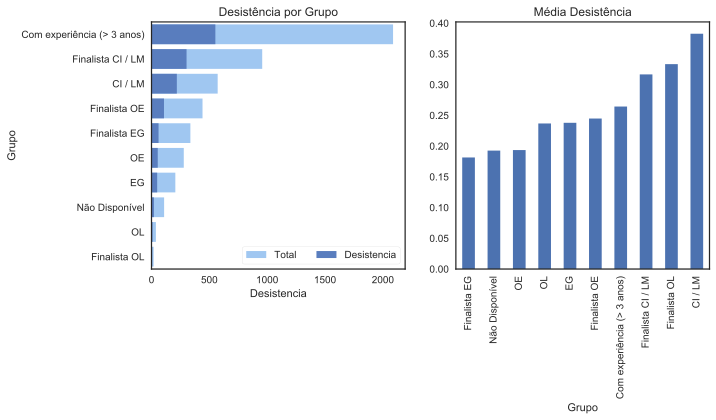

In [435]:
#New data_frame
grupo_total = data.Grupo.value_counts()
grupo_desistencia = data.loc[data['Desistencia']==1,'Grupo'].value_counts()
index = np.transpose(grupo_total.index)
total = np.transpose(grupo_total.values)
desistencia = np.transpose(grupo_desistencia.values) 
data_grupo = pd.concat([pd.DataFrame({'Grupo':index}),
                        pd.DataFrame({'Total':total}),
                        pd.DataFrame({'Desistencia':desistencia})],axis=1)

plt.figure(figsize=[10,10])

plt.subplot(221)
#Plot the total 
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Grupo", data=data_grupo,label='Total',color='b')

#Plot the abandon
sns.set_color_codes("muted")
sns.barplot(x="Desistencia", y="Grupo", data=data_grupo, label='Desistencia',color='b')

#Legends and labels info
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.title('Desistência por Grupo')

plt.subplot(222)
#Plot the abandon mean
data.groupby(['Grupo'])['Desistencia'].mean().sort_values().plot(kind='bar')
plt.title('Média Desistência')

COMMENTS:
- A maior parte do DataSet encontra-se no grupo de pessoas com mais de 3 anos de Experiência
- A maior rate de Desistência encontra-se em Cursos de IT e Matemáticas

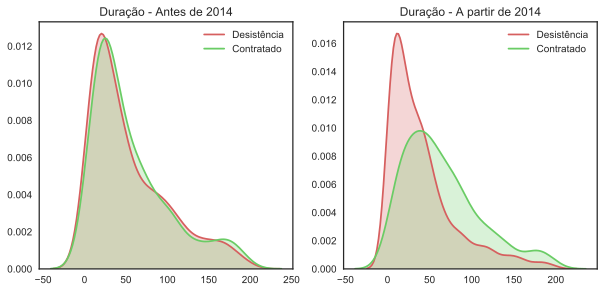

In [437]:
totalentrevista=train.loc[(train['TotalEntrevista']>0)&(train['TotalEntrevista']<200)
                         &(train['AnoRecepcao']<2014),]
totalentrevistaim=train.loc[(train['TotalEntrevista']>0)&(train['TotalEntrevista']<200)
                         &(train['AnoRecepcao']>=2014),]

plt.figure(figsize=[10,10])

plt.subplot(221)

sns.kdeplot(totalentrevista.loc[(totalentrevista['Desistencia']==1),'TotalEntrevista'],color='r',shade=True,label='Desistência')
sns.kdeplot(totalentrevista.loc[(totalentrevista['Contratado']==1),'TotalEntrevista'],color='g',shade=True,label='Contratado')
plt.title('Duração - Antes de 2014')

plt.subplot(222)

sns.kdeplot(totalentrevistaim.loc[(totalentrevistaim['Desistencia']==1),'TotalEntrevista'],color='r',shade=True,label='Desistência')
sns.kdeplot(totalentrevistaim.loc[(totalentrevistaim['Contratado']==1),'TotalEntrevista'],color='g',shade=True,label='Contratado')
plt.title('Duração - A partir de 2014')

plt.show()

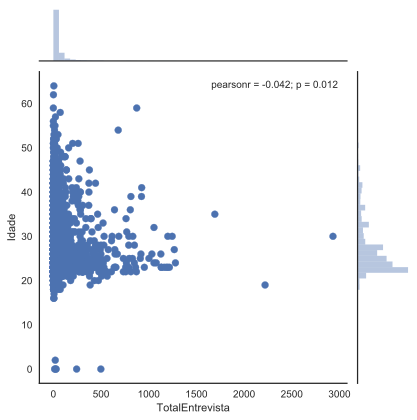

In [438]:
sns.jointplot(x='TotalEntrevista', y='Idade', data=data)

COMMENTS:
- Os candidatos que desistem, intensificam-se essencialmente nos primeiros dias. É importante acelerar o processo de recrutamento.
- Jointplot demonstram uma distribuição com muitos outliers quer em termos de duração e de idade que terão de ser removidos da análise.

**Fases**

Disponibilidade,Imediata,Não Imediata,All
Fases,,,
0,27,608,635
1,351,1944,2295
2,135,986,1121
3,119,596,715
4,60,218,278
All,692,4352,5044


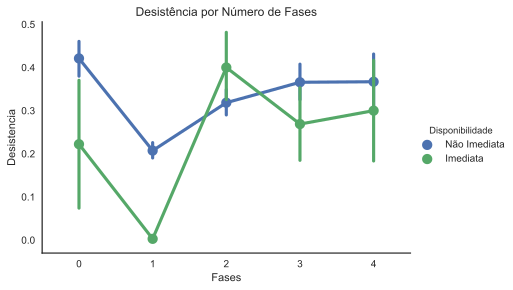

In [439]:
#NUMERO DE FASES
sns.factorplot('Fases','Desistencia',hue='Disponibilidade',data=data,aspect=1.5)
plt.title('Desistência por Número de Fases')

pd.crosstab(data.Fases,data.Disponibilidade, margins=True)

COMMENTS:
- Fases a mostrar um elevado impacto na Desistência
- Elementos com disponibilidade imediata e com processos de 1 fase tem 0 em média de Desistência

In [440]:
data.loc[:,['Desistencia','Nível']].groupby(['Nível'])['Desistencia'].agg(['mean','count'])

,mean,count
Nível,,
Consultor,0.000000,1
Júnior Base,0.800000,5
Júnior com Experiência,0.857143,7
Manager,0.000000,4
Project Leader,0.000000,1
Team Leader,0.333333,3


## Limpeza e Estruturação dos Dados

In [376]:
# Choosing the variables for modelling
var_model=['Desistencia','Idade','Curso', 'Universidade', 'TipoCurso','OrigemCandidatura', 
           'Recomendado','Disponibilidade', 'Grupo','Fases']
datamodel = data[var_model]

In [377]:
#Deleting NULL
datamodel.drop(datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['Universidade'].isnull())&(datamodel['Curso'].isnull())&
             (datamodel['TipoCurso'].isnull())&(datamodel['OrigemCandidatura'].isnull()),].index,inplace=True)
datamodel.head()

,Desistencia,Idade,Curso,Universidade,TipoCurso,OrigemCandidatura,Recomendado,Disponibilidade,Grupo,Fases
45,0,30.0,IT,ISCTE,Licenciatura,Referenciada,Não,Não Imediata,Finalista CI / LM,4
106,0,52.0,Sem Curso,Sem Universidade,12º Ano,Referenciada,Não,Não Imediata,Com experiência (> 3 anos),1
791,0,NaN,Economia,U LUSÓFONA,Licenciatura,Web,Não,Não Imediata,Com experiência (> 3 anos),2
840,0,31.0,Gestão,ISCTE,Mestrado,NaN,Não,Não Imediata,Com experiência (> 3 anos),2
1749,0,43.0,Engenharia IT,Outra,Licenciatura,Referenciada,Não,Não Imediata,Com experiência (> 3 anos),2


In [378]:
# Missing Data
columns=[]
values=[]
ratio=[]
for i in datamodel:
    if datamodel[i].isnull().sum() > 0:
        columns.append(i)
        values.append(datamodel[i].isnull().sum())
        ratio.append(datamodel[i].isnull().sum()/len(datamodel)*100)
missingvariables=pd.DataFrame({'Columns':columns,'Totalmissing':values,'Percentagem':ratio}).sort_values(by=['Totalmissing'],ascending=False)
missingvariables

,Columns,Percentagem,Totalmissing
0,Idade,29.982153,1512
2,Universidade,3.708110,187
1,Curso,3.291691,166
3,TipoCurso,2.181241,110
4,OrigemCandidatura,1.328574,67


**Universidade**

In [379]:
datamodel.drop(datamodel.loc[datamodel['Universidade'].isnull(),].index,inplace=True)

**Curso**

In [380]:
#Data Imputation
datamodel.loc[(datamodel['Curso'].isnull())&(datamodel['Universidade']=='IST'),'Curso']='Engenharia'
datamodel.loc[(datamodel['Curso'].isnull())&(datamodel['Grupo']=='CI / LM'),'Curso']='IT'

In [381]:
#Drop NaN
datamodel.drop(datamodel.loc[datamodel['Curso'].isnull(),].index,inplace=True)

**TipoCurso**

In [382]:
#Drop Nan
datamodel.drop(datamodel.loc[datamodel['TipoCurso'].isnull(),].index,inplace=True)

**OrigemCandidatura**

In [383]:
#Drop Nan
datamodel.drop(datamodel.loc[datamodel['OrigemCandidatura'].isnull(),].index,inplace=True)

**Idade**

In [384]:
datamodel.groupby(['OrigemCandidatura','TipoCurso'])['Idade'].mean()

OrigemCandidatura  TipoCurso   
BD                 Licenciatura    24.050000
                   Mestrado        24.519810
Espontânea         12º Ano         26.782609
                   Doutoramento    30.000000
                   Licenciatura    27.267717
                   Mestrado        25.243243
Evento             12º Ano               NaN
                   Doutoramento    33.000000
                   Licenciatura    24.127907
                   Mestrado        24.248000
Headhunting        12º Ano         32.130435
                   Doutoramento    40.000000
                   Licenciatura    33.800971
                   Mestrado        30.604167
Referenciada       12º Ano         28.048193
                   Doutoramento    33.000000
                   Licenciatura    32.377863
                   Mestrado        27.816143
Subcontratação     12º Ano         29.000000
                   Licenciatura    35.400000
                   Mestrado        35.333333
Web                12º 

In [385]:
# #Imputar informação em falta em IDADE

# BD
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='BD')&
              (datamodel['TipoCurso']=='Licenciatura'),'Idade']=24
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='BD')&
              (datamodel['TipoCurso']=='Mestrado'),'Idade']=25

# Espontânea
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Espontânea')&
              (datamodel['TipoCurso']=='12º Ano'),'Idade']=27
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Espontânea')&
              (datamodel['TipoCurso']=='Doutoramento'),'Idade']=30
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Espontânea')&
              (datamodel['TipoCurso']=='Licenciatura'),'Idade']=27
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Espontânea')&
              (datamodel['TipoCurso']=='Mestrado'),'Idade']=25

# Evento
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Evento')&
              (datamodel['TipoCurso']=='Doutoramento'),'Idade']=33

datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Evento')&
              (datamodel['TipoCurso']=='Licenciatura') | (datamodel['TipoCurso']=='Mestrado'),'Idade']=24

#HeadHunting
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Headhunting')&
              (datamodel['TipoCurso']=='12º Ano'),'Idade']=32
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Headhunting')&
              (datamodel['TipoCurso']=='Doutoramento'),'Idade']=40
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Headhunting')&
              (datamodel['TipoCurso']=='Licenciatura'),'Idade']=32
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Headhunting')&
              (datamodel['TipoCurso']=='Mestrado'),'Idade']=31

#Referenciada
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Referenciada')&
              (datamodel['TipoCurso']=='12º Ano'),'Idade']=28
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Referenciada')&
              (datamodel['TipoCurso']=='Doutoramento'),'Idade']=33
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Referenciada')&
              (datamodel['TipoCurso']=='Licenciatura'),'Idade']=32
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Referenciada')&
              (datamodel['TipoCurso']=='Mestrado'),'Idade']=28

#Subcontratação
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Subcontratação')&
              (datamodel['TipoCurso']=='12º Ano'),'Idade']=29
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Subcontratação')&
              (datamodel['TipoCurso']=='Licenciatura')|(datamodel['TipoCurso']=='Mestrado'),'Idade']=35

#Web
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Web')&
              (datamodel['TipoCurso']=='12º Ano'),'Idade']=27
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Web')&
              (datamodel['TipoCurso']=='Licenciatura'),'Idade']=32
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Web')&
              (datamodel['TipoCurso']=='Mestrado'),'Idade']=28

In [386]:
# Drop NaN and OutLiers
datamodel.drop(datamodel.loc[(datamodel['Idade'].isnull())|(datamodel['Idade']>60)|(datamodel['Idade']<18),]
               .index,inplace=True)

# Changing data type
datamodel['Idade']=datamodel['Idade'].astype('int64')

**Fases**

In [387]:
# Removing Fases == 0, since it's not predictable
datamodel = datamodel.loc[datamodel['Fases']!=0,]

**Dados em Falta**

In [388]:
for i in datamodel:
    if datamodel[i].isnull().sum()>0:
        print(i)
    if datamodel[i].isnull().sum()==0:
        print('A variável {} não tem dados em Falta'.format(i))

A variável Desistencia não tem dados em Falta
A variável Idade não tem dados em Falta
A variável Curso não tem dados em Falta
A variável Universidade não tem dados em Falta
A variável TipoCurso não tem dados em Falta
A variável OrigemCandidatura não tem dados em Falta
A variável Recomendado não tem dados em Falta
A variável Disponibilidade não tem dados em Falta
A variável Grupo não tem dados em Falta
A variável Fases não tem dados em Falta


**Substituir Strings**

Creation of Dummy Variables - Not used as did not add value to the model
String Replacement

In [343]:
# For Creation of Dummy Variables

# cat_list = pd.get_dummies(datamodel['OrigemCandidatura'], prefix=var)
# data1=datamodel.join(cat_list)
# datamodel=data1
# datamodel.drop(['OrigemCandidatura'], axis=1,inplace=True)

In [389]:
# FOR REPLACING STRINGS
def replacing(x,df):
    replace_var=[]
    unique=df[x].unique()
    for i in range (len(df[x].unique())):
        replace_var.append(i)
    df[x].replace(unique,replace_var,inplace=True)

for i in datamodel.iloc[:,2:9]:
    replacing(i,datamodel)

In [18]:
cols=['Idade', 'Curso', 'Universidade', 'TipoCurso','OrigemCandidatura', 'Recomendado', 'Disponibilidade', 'Grupo',
       'Fases']
sns.pairplot(data=datamodel, hue='Desistencia')
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Preparação para Modelação

In [390]:
#DEFINITION OF VARIABLES FOR MODELLING
y=datamodel.loc[:,'Desistencia']
X=datamodel.iloc[:,1:]

Iteration nº:  1
[8.9329531318165447, 4.6544795452556178, 4.0407102668161059, 3.0448860817004442, 3.1756972490163893, 1.0079268060602748, 1.313087005783053, 2.4597145619035361, 4.2935912422418534]
With the value of.:   8.93295313182

Max vif is for variable.:  Idade


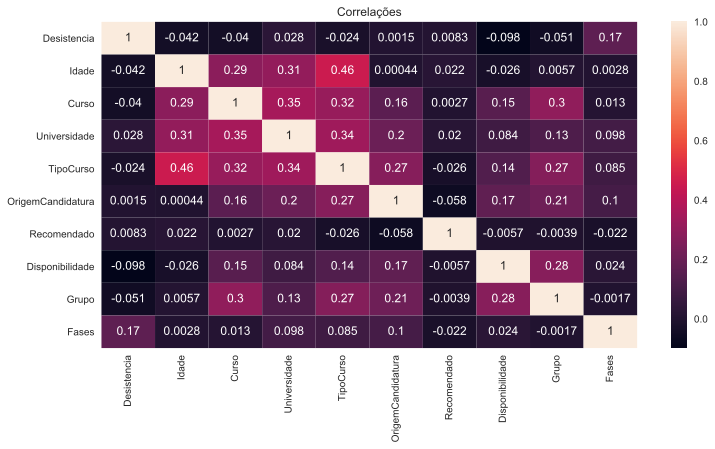

In [441]:
#COLLINEARITY

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    threeshold=10
    output=pd.DataFrame()
    vif=[variance_inflation_factor(np.array(X.values,dtype='float'),j) for j in range (X.shape[1])]
    for i in range (1,X.shape[1]):
        print('Iteration nº: ',i)
        print(vif)
        a=np.argmax(vif)
        print('With the value of.:  ',vif[a])
        print('')
        print('Max vif is for variable.: ',X.columns[a])
        if vif[a] <= threeshold:
            break
        if i == 1:
            output = X.drop(X.columns[a], axis = 1)
            vif=[variance_inflation_factor(np.array(output.values,dtype='float'),j) for j in range (output.shape[1])]
        elif i > 1:
            output = output.drop(output.columns[a], axis = 1)
            vif=[variance_inflation_factor(np.array(output.values,dtype='float'),j) for j in range (output.shape[1])]
        return(output.collumns)
    
calculate_vif(X)

fig=plt.figure(figsize=(12,6),)
sns.heatmap(datamodel.corr(),annot=True,)
plt.title('Correlações')
plt.show()


In [351]:
datamodel['Desistencia'].value_counts()

0    3126
1    1073
Name: Desistencia, dtype: int64

## Modelação

### Classificadores

In [392]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

**Logistic Regression**

In [393]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
prediction1=lg.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction1))
pd.DataFrame(list(zip(X.columns, np.transpose(lg.coef_))))

Accuracy.:  0.744444444444


,0,1
0,Idade,[-0.0281051051157]
1,Curso,[-0.0149256956616]
2,Universidade,[0.0222561820556]
3,TipoCurso,[-0.0383807764481]
4,OrigemCandidatura,[-0.00839023442749]
5,Recomendado,[0.159322100785]
6,Disponibilidade,[-0.690065511835]
7,Grupo,[-0.0261260416705]
8,Fases,[0.355893248723]


**Suport Vector Machine**

In [394]:
#rbf SVC
rbf=SVC()
rbf.fit(x_train,y_train)
prediction2=rbf.predict(x_test)

#linear SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
prediction3=model.predict(x_test)

print('Accuracy.: ',metrics.accuracy_score(y_test,prediction2))
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction3))

Accuracy.:  0.738888888889
Accuracy.:  0.75


**Random Forest**

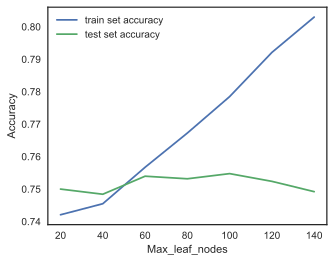

In [395]:
max_leaf_nodes=list(range(20,160,20))
randomforest_train=pd.Series()
randomforest_test=pd.Series()
for i in max_leaf_nodes:
    model=RandomForestClassifier(max_leaf_nodes=i, n_estimators=200)
    model.fit(x_train,y_train)
    prediction_train=model.predict(x_train)
    prediction_test=model.predict(x_test)
    randomforest_train=randomforest_train.append(pd.Series(metrics.accuracy_score(y_train,prediction_train)))
    randomforest_test=randomforest_test.append(pd.Series(metrics.accuracy_score(y_test,prediction_test)))
# plt.subplots(figsize=(15,10))
plt.plot(max_leaf_nodes,randomforest_train, label='train set accuracy')
plt.plot(max_leaf_nodes,randomforest_test,label='test set accuracy')
plt.xlabel('Max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend()    

In [396]:
rf=RandomForestClassifier(max_leaf_nodes=50)
rf.fit(x_train,y_train)
prediction4=rf.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction4))

Accuracy.:  0.751587301587


**Decision Tree**

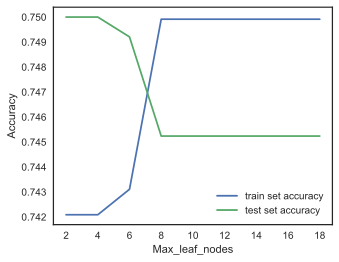

In [397]:
max_leaf_nodes=list(range(2,20,2))
decisiontrees_train=pd.Series()
decisiontrees_test=pd.Series()
for i in max_leaf_nodes:
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(x_train,y_train)
    prediction_train=model.predict(x_train)
    prediction_test=model.predict(x_test)
    decisiontrees_train=decisiontrees_train.append(pd.Series(metrics.accuracy_score(y_train,prediction_train)))
    decisiontrees_test=decisiontrees_test.append(pd.Series(metrics.accuracy_score(y_test,prediction_test)))
# plt.subplots(figsize=(15,10))
plt.plot(max_leaf_nodes,decisiontrees_train, label='train set accuracy')
plt.plot(max_leaf_nodes,decisiontrees_test, label='test set accuracy')
plt.xlabel('Max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend()

In [442]:
dt=DecisionTreeClassifier(max_leaf_nodes=7)
dt.fit(x_train, y_train)
prediction5=dt.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction5))

Accuracy.:  0.745238095238


**K Nearest Neighbors**

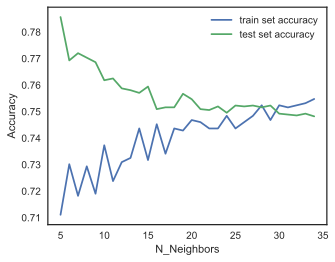

In [399]:
N_Neighbors= list(range(5,35))
knn_train=pd.Series()
knn_test=pd.Series()
for i in N_Neighbors:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    prediction_train=model.predict(x_test)
    prediction_test=model.predict(x_train)
    knn_train=knn_train.append(pd.Series(metrics.accuracy_score(y_test,prediction_train)))
    knn_test=knn_test.append(pd.Series(metrics.accuracy_score(y_train,prediction_test)))
# plt.subplots(figsize=(15,10))
plt.plot(N_Neighbors,knn_train, label='train set accuracy')
plt.plot(N_Neighbors,knn_test, label='test set accuracy')
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [400]:
model=KNeighborsClassifier(n_neighbors=28,)
model.fit(x_train,y_train)
prediction6=model.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction6))

Accuracy.:  0.752380952381


**Naive Bayes**

In [401]:
model=GaussianNB()
model.fit(x_train,y_train)
prediction7=model.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction7))

Accuracy.:  0.74126984127


**Neural Networks**

In [402]:
model=MLPClassifier()
model.fit(x_train,y_train)
prediction8=model.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction8))

Accuracy.:  0.749206349206


**ADAboost**

In [403]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
prediction9=model.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction9))

Accuracy.:  0.749206349206


**GradientBoosting**

In [404]:
grad=GradientBoostingClassifier(learning_rate=0.05)
grad.fit(x_train,y_train)
prediction10=grad.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction10))

Accuracy.:  0.746031746032


**ExtraTrees**

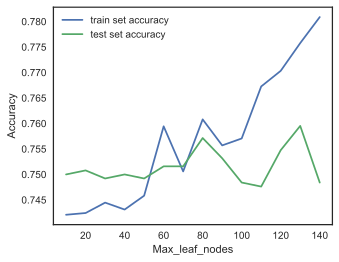

In [407]:
max_leaf_nodes=list(range(10,150,10))
extratrees_train=pd.Series()
extratrees_test=pd.Series()
for i in max_leaf_nodes:
    model=ExtraTreesClassifier(max_leaf_nodes=i)
    model.fit(x_train,y_train)
    prediction_train=model.predict(x_train)
    prediction_test=model.predict(x_test)
    extratrees_train=extratrees_train.append(pd.Series(metrics.accuracy_score(y_train,prediction_train)))
    extratrees_test=extratrees_test.append(pd.Series(metrics.accuracy_score(y_test,prediction_test)))
# plt.subplots(figsize=(15,10))
plt.plot(max_leaf_nodes,extratrees_train, label='train set accuracy')
plt.plot(max_leaf_nodes,extratrees_test, label='test set accuracy')
plt.xlabel('Max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend()

In [409]:
extra=ExtraTreesClassifier(max_leaf_nodes=60,max_features='auto',bootstrap=True,oob_score=True)
extra.fit(x_train,y_train)
prediction11=extra.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction11))

Accuracy.:  0.750793650794


In [133]:
# from xgboost import XGBClassifier
# model=XGBClassifier()
# model.fit(x_train,y_train)
# prediction11=model.predict(x_test)

# from lightgbm import LGBMClassifier
# model=LGBMClassifier()
# model.fit(x_train,y_train)
# prediction14=model.predict(x_test)

**ROC SCORE**

In [410]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 

logit_roc_auc = roc_auc_score(y_test, lg.predict(x_test))
dt_roc_auc = roc_auc_score(y_test, dt.predict(x_test))
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
ada_roc_auc = roc_auc_score(y_test, ada.predict(x_test))
grad_roc_auc = roc_auc_score(y_test, grad.predict(x_test))
extra_roc_auc = roc_auc_score(y_test, extra.predict(x_test))

print ("DecisionTrees = %2.2f \n" % dt_roc_auc)
print(classification_report(y_test, ada.predict(x_test)))

DecisionTrees = 0.52 

             precision    recall  f1-score   support

          0       0.75      0.96      0.84       945
          1       0.27      0.04      0.07       315

avg / total       0.63      0.73      0.65      1260



**ROC CURVE**

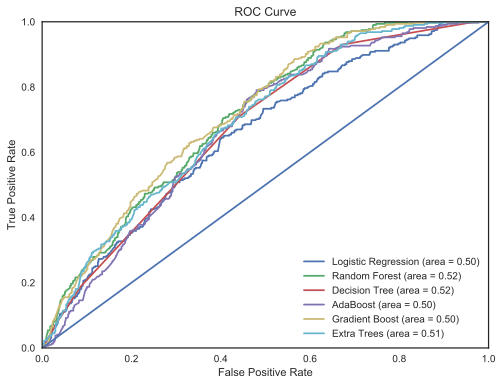

In [411]:
# Create ROC CURVE

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(x_test)[:,1])
grad_fpr, grad_tpr, grad_thresholds = roc_curve(y_test, grad.predict_proba(x_test)[:,1])
extra_fpr, extra_tpr, extra_thresholds = roc_curve(y_test, extra.predict_proba(x_test)[:,1])

plt.figure(figsize=(8,6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot GradientBoost ROC
plt.plot(grad_fpr, grad_tpr, label='Gradient Boost (area = %0.2f)' % grad_roc_auc)

# Plot ExtraTrees ROC
plt.plot(extra_fpr, extra_tpr, label='Extra Trees (area = %0.2f)' % extra_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**BETTER MODELS FROM ACCURACY:**
- Gradient Boosting
- Random Forest
- Decision Trees
- rbf SVC
- AdaBoost
- Extra Decision Trees

### Tuning of Hyper Parameters

In [70]:
from sklearn.model_selection import GridSearchCV

In [195]:
#Support Vector Machine
C=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd1=GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
gd1.fit(x_train,y_train)


print('The best score for SVM is: ', gd1.best_score_)
print('With the estimator parameters: \n \n', gd1.best_estimator_)

Fitting 3 folds for each of 220 candidates, totalling 660 fits


[Parallel(n_jobs=1)]: Done 660 out of 660 | elapsed:  1.5min finished


The best score for SVM is:  0.745831915618
With the estimator parameters: 
 
 SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [196]:
#Random Forest
n_estimators=range(100,1100,100)
hyper={'n_estimators':n_estimators}
gd2=GridSearchCV(estimator=rf,param_grid=hyper,verbose=True)
gd2.fit(x_train,y_train)

print('The best score for Random Forest is: ', gd2.best_score_)
print('With the estimator parameters: \n \n', gd2.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.5s finished


The best score for Random Forest is:  0.7437904049
With the estimator parameters: 
 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [197]:
#AdaBoost
n_estimators=list(range(50,500,50))
learning_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
hyper={'n_estimators':n_estimators,'learning_rate':learning_rate}
gd3=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd3.fit(x_train,y_train)
print('The best score for AdaBoost is: ', gd3.best_score_)
print('With the estimator parameters: \n \n', gd3.best_estimator_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
The best score for AdaBoost is:  0.742089145968
With the estimator parameters: 
 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=50, random_state=None)


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  2.5min finished


In [198]:
#Gradient Boosting
n_estimators=list(range(100,1100,100))
learning_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
hyper={'n_estimators':n_estimators,'learning_rate':learning_rate}
gd4=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True)
gd4.fit(x_train,y_train)
print('The best score for Gradient Boosting is: ', gd4.best_score_)
print('With the estimator parameters: \n \n', gd4.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
The best score for Gradient Boosting is:  0.737665872746
With the estimator parameters: 
 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.5min finished


### Matriz de Confusão

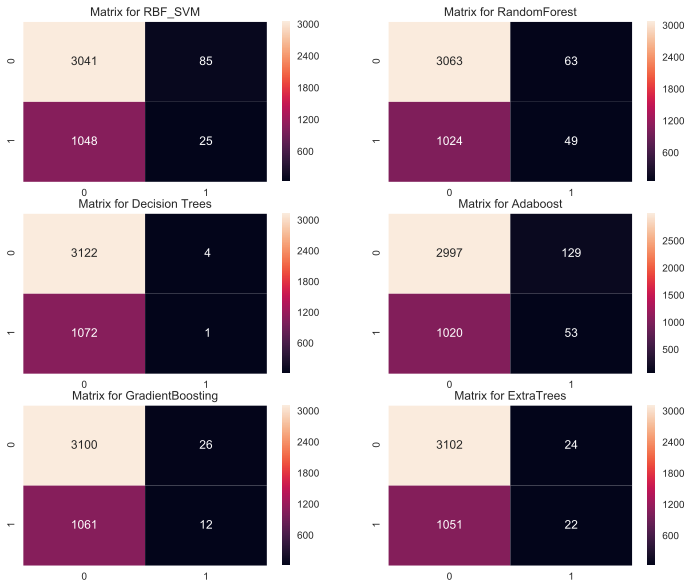

In [417]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

f,ax=plt.subplots(3,2,figsize=(12,10))

pred=cross_val_predict(SVC(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f', ax=ax[0,0])
ax[0,0].set_title('Matrix for RBF_SVM')

pred=cross_val_predict(RandomForestClassifier(max_leaf_nodes=50),X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f', ax=ax[0,1])
ax[0,1].set_title('Matrix for RandomForest')

pred=cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=7,),X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f', ax=ax[1,0])
ax[1,0].set_title('Matrix for Decision Trees')

pred=cross_val_predict(AdaBoostClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f', ax=ax[1,1])
ax[1,1].set_title('Matrix for Adaboost')

pred=cross_val_predict(GradientBoostingClassifier(learning_rate=0.05,),X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f', ax=ax[2,0])
ax[2,0].set_title('Matrix for GradientBoosting')

pred=cross_val_predict(ExtraTreesClassifier(max_leaf_nodes=60),X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f', ax=ax[2,1])
ax[2,1].set_title('Matrix for ExtraTrees')

plt.show()

### Increasing True Positives Rate for Decision Trees

Text(0.5,1,'Accuracy')

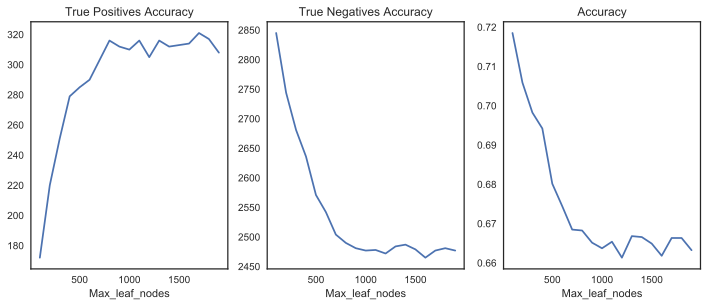

In [315]:
max_leaf_nodes=list(range(100,2000,100))
true_positive=pd.Series()
true_negative=pd.Series()
accuracy=pd.Series()
for i in max_leaf_nodes:
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    pred=cross_val_predict(model,X,y,cv=10)
    c_matrix=confusion_matrix(y,pred)
    true_positive=true_positive.append(pd.Series(c_matrix[1,1]))
    true_negative=true_negative.append(pd.Series(c_matrix[0,0]))
    accuracy=accuracy.append(pd.Series(metrics.accuracy_score(y,pred)))

plt.figure(figsize=[12,10])

#True Positives
plt.subplot(231)
plt.plot(max_leaf_nodes,true_positive)
plt.xlabel('Max_leaf_nodes')
# plt.ylabel('True Positives')
plt.title('True Positives Accuracy')

#True Negatives
plt.subplot(232)
plt.plot(max_leaf_nodes,true_negative)
plt.xlabel('Max_leaf_nodes')
# plt.ylabel('True Negatives')
plt.title('True Negatives Accuracy')

#True Negatives
plt.subplot(233)
plt.plot(max_leaf_nodes,accuracy)
plt.xlabel('Max_leaf_nodes')
# plt.ylabel('True Negatives')
plt.title('Accuracy')


Accuracy = 0.667, Deviation of : 0.025


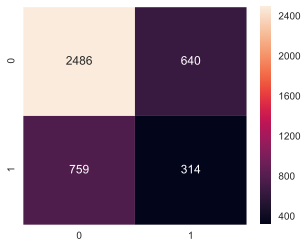

In [418]:
model=DecisionTreeClassifier(max_leaf_nodes=1250,)
pred=cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f')

cv_result=cross_val_score(model,X,y,cv=5,scoring='accuracy')
print('Accuracy = %.3f, Deviation of : %.3f'% (cv_result.mean(),cv_result.std()))

## Validação do Modelo

### Cross Validation

In [419]:
#Libraries
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

kfold=KFold()
accuracy_mean=[]
accuracy_std=[]
classifiers=['RBF SVM','Linear SVM','Logistic Regression','Decision Trees','Random Forest',
             'KNneighbors','Naive Bayes','Neural Networks','Adaboostclassifier',
             'GradientBoostingClassifier', 'ExtraTrees']
models=[SVC(),SVC(kernel='linear'),LogisticRegression(),dt,
        rf,KNeighborsClassifier(n_neighbors=28),
        GaussianNB(),MLPClassifier(),AdaBoostClassifier(), GradientBoostingClassifier(learning_rate=0.05),
        ExtraTreesClassifier(max_leaf_nodes=110)]
        # Already with hyper parameters
for i in models:
    model=i
    cv_result=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    accuracy_mean.append(cv_result.mean())
    accuracy_std.append(cv_result.std())

model_frame=pd.DataFrame({'Classifiers':classifiers,'Model_Mean':accuracy_mean,'Model_Std':accuracy_std})
model_frame.sort_values(by=['Model_Mean'],ascending=False)

,Classifiers,Model_Mean,Model_Std
1,Linear SVM,0.744468,0.029456
3,Decision Trees,0.744468,0.029456
10,ExtraTrees,0.743277,0.030099
7,Neural Networks,0.742563,0.028111
2,Logistic Regression,0.740895,0.027934
4,Random Forest,0.739941,0.028092
5,KNneighbors,0.739705,0.028630
9,GradientBoostingClassifier,0.737082,0.026137
6,Naive Bayes,0.733988,0.027629
0,RBF SVM,0.729939,0.023382


### Feature Importance

In [423]:
summary = pd.DataFrame(list(zip(X.columns, \
    np.transpose(dt.feature_importances_), \
    np.transpose(rf.feature_importances_), \
    np.transpose(extra.feature_importances_), \
    np.transpose(grad.feature_importances_), \
    np.transpose(ada.feature_importances_))), 
                       columns=['Variable','DT','RF','ET','GB','AdaB'])
  
summary['Average'] = summary.mean(1)
summary.sort_values('Average', ascending=False)

,Variable,DT,RF,ET,GB,AdaB,Average
8,Fases,0.428296,0.260999,0.306752,0.207712,0.06,0.252752
4,OrigemCandidatura,0.475584,0.163658,0.146842,0.176618,0.16,0.224540
0,Idade,0.000000,0.134467,0.096287,0.155706,0.28,0.133292
7,Grupo,0.000000,0.114460,0.103276,0.157946,0.16,0.107136
1,Curso,0.000000,0.103050,0.119011,0.105103,0.18,0.101433
2,Universidade,0.000000,0.124061,0.105678,0.103061,0.14,0.094560
6,Disponibilidade,0.096121,0.054843,0.048925,0.057070,0.02,0.055392
3,TipoCurso,0.000000,0.040062,0.069626,0.036783,0.00,0.029294
5,Recomendado,0.000000,0.004400,0.003603,0.000000,0.00,0.001601


## Ensembling

### Voting Classifier

In [424]:
from sklearn.ensemble import VotingClassifier

vote_model = VotingClassifier(estimators=[('tree',DecisionTreeClassifier(max_leaf_nodes=1250,)),('forest',rf),('extra',extra),
                                          ('gradboost',grad),('rbf',rbf)])
vote_model.fit(X,y)
#pred=vote_model.predict(X)
#print('Accuracy.: ',metrics.accuracy_score(y,pred))
vote_score = cross_val_score(vote_model,X,y,cv=5,scoring='accuracy')
print('Voting Accuracy: %0.2f with a Stand Deviation of %0.2f' % (vote_score.mean(), vote_score.std()))

Voting Accuracy: 0.74 with a Stand Deviation of 0.00


Text(0.5,1,'Matrix for Voting Classifier')

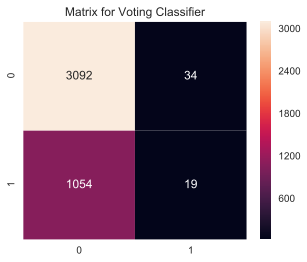

In [425]:
pred=cross_val_predict(vote_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='2.0f')
plt.title('Matrix for Voting Classifier')